In [2]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit

messages=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID_COMBINE pol sent NEW.csv',header=None,names=["text","polarity","sentiment"])
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer


In [3]:
#descriptions
print(messages.describe())

          polarity
count  8910.000000
mean      0.051901
std       0.222052
min      -1.000000
25%       0.000000
50%       0.000000
75%       0.136364
max       1.000000


In [4]:
# class distribution
print(messages.groupby('sentiment').size())

sentiment
negative    1416
neutral     4099
positive    3395
dtype: int64


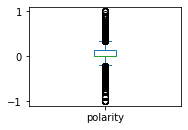

In [5]:
from matplotlib import pyplot
messages.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

In [6]:
messages['text']

0       msmagazine nfor valentinesday covid n roses re...
1       todayx xs truckers protest parliament hill bec...
2       bust_magazine nfor valentinesday covid n roses...
3       audreymagazine nfor valentinesday covid n rose...
4                            apreudent kissing coronaviru
                              ...                        
8905    good question rats managed order coming jan de...
8906    prevent spread covid country must work continu...
8907    narratives social formations dominated last tw...
8908    x xci never dealt much death careerx xd nurses...
8909    odisha records low daily caseload th day wait ...
Name: text, Length: 8910, dtype: object

In [7]:
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer
import re
corpus = []
lemmatizer = WordNetLemmatizer()
 
    



for i in range(0,len(messages['text'])):
   
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    non_word=['n','rt','xe','xa','xc','co','xf','xxd','xs','x','nx','ni','nfor','nhow','eh','de''amo','nis','wa']
    review=[e for e in review if e not in non_word]
   
  
    corpus.append(review)
  

In [8]:
corpus

[['msmagazine',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine'],
 ['todayx',
  'trucker',
  'protest',
  'parliament',
  'hill',
  'become',
  'canadax',
  'answer',
  'sturgis',
  'superspreader',
  'sans',
  'smash',
  'mo'],
 ['bust',
  'magazine',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine'],
 ['audreymagazine',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine',
  'yo'],
 ['apreudent', 'kissing', 'coronaviru'],
 ['thedailybeast',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine'],
 ['death',
  'due',
  'omicron',
  'high',
  'delta',
  'cdcgov',
  'nih',
  'thelancetinfdis',
  'cdc',
  'ncezid',
  'infectdisnews'],
 ['theweek',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine',
  'nan'],
 ['vanityfair',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nv

In [9]:
X=[]
for i in range (len(corpus)):
    c=''.join([str(elem+" ") for elem in corpus[i]])
    X.append(c)


In [10]:
X

['msmagazine valentinesday covid rose red nviolets blue got vaccine ',
 'todayx trucker protest parliament hill become canadax answer sturgis superspreader sans smash mo ',
 'bust magazine valentinesday covid rose red nviolets blue got vaccine ',
 'audreymagazine valentinesday covid rose red nviolets blue got vaccine yo ',
 'apreudent kissing coronaviru ',
 'thedailybeast valentinesday covid rose red nviolets blue got vaccine ',
 'death due omicron high delta cdcgov nih thelancetinfdis cdc ncezid infectdisnews ',
 'theweek valentinesday covid rose red nviolets blue got vaccine nan ',
 'vanityfair valentinesday covid rose red nviolets blue got vaccine ',
 'rumpus valentinesday covid rose red nviolets blue got vaccine ',
 'utnereader valentinesday covid rose red nviolets blue got vaccine ',
 'motherjones valentinesday covid rose red nviolets blue got vaccine ',
 'cpho canada justintrudeau coronavirus covid fordnation celliottability epdevilla jyduclos nsweden decide ',
 'another loss due

In [11]:
#bag of words converting X in vector numbers
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
Y=cv.fit_transform(X).toarray()

#y_score(y_test,y_pred)

In [12]:
w=messages['sentiment']
type(w)



pandas.core.series.Series

In [13]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(Y, w, test_size=0.20, random_state=1)

In [14]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [15]:
# Spot Check Algorithms
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import time
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	start=time.time()
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	model1=model.fit(X_train,Y_train)
	y_pred=model1.predict(X_validation)    
	end=time.time()
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f) %s (%f)' % (name, cv_results.mean(), cv_results.std(),'time taken',end-start))
	score1=precision_recall_fscore_support(Y_validation.astype(str),y_pred.astype(str),labels=['neutral','negative','positive'],average='micro',zero_division=1)   
	print("score",score1)

LR: 0.851715 (0.010732) time taken (8.152506)
score (0.8787878787878788, 0.8787878787878788, 0.8787878787878788, None)
LDA: 0.795455 (0.011651) time taken (461.975171)
score (0.8265993265993266, 0.8265993265993266, 0.8265993265993266, None)
KNN: 0.592732 (0.007693) time taken (698.257764)
score (0.5948372615039281, 0.5948372615039281, 0.5948372615039281, None)
CART: 0.846244 (0.018337) time taken (577.772465)
score (0.8625140291806959, 0.8625140291806959, 0.8625140291806959, None)
NB: 0.559765 (0.016571) time taken (9.105931)
score (0.5432098765432098, 0.5432098765432098, 0.5432098765432098, None)
SVM: 0.509261 (0.006026) time taken (4826.256569)
score (0.5258136924803591, 0.5258136924803591, 0.5258136924803591, None)


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [17]:
# Spot Check Algorithms
models = []

models.append(('MultiNB', MultinomialNB()))
models.append(('BerNB', BernoulliNB()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearSVC', LinearSVC(max_iter=5000)))
models.append(('Adab', AdaBoostClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('PassiveAC', PassiveAggressiveClassifier()))
models.append(('Perceptron',  Perceptron()))
models.append(('RFT', RandomForestClassifier()))
models.append(('MLP', MLPClassifier()))
# evaluate each model in turn
results = []
names = []
accuracy=[]
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	start=time.time()
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	model1=model.fit(X_train,Y_train)
	y_pred=model1.predict(X_validation)    
	end=time.time()
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f) %s (%f)' % (name, cv_results.mean(), cv_results.std(),'time taken',end-start))
	score1=precision_recall_fscore_support(Y_validation.astype(str),y_pred.astype(str),labels=['neutral','negative','positive'],average='micro',zero_division=1)   
	print("score",score1)

MultiNB: 0.742845 (0.015024) time taken (11.438757)
score (0.7676767676767676, 0.7676767676767676, 0.7676767676767676, None)
BerNB: 0.761222 (0.012919) time taken (13.966160)
score (0.7867564534231201, 0.7867564534231201, 0.78675645342312, None)
LR: 0.851715 (0.010732) time taken (8.006155)
score (0.8787878787878788, 0.8787878787878788, 0.8787878787878788, None)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC: 0.859711 (0.008083) time taken (31.477099)
score (0.8810325476992144, 0.8810325476992144, 0.8810325476992144, None)
Adab: 0.788723 (0.011262) time taken (398.512727)
score (0.7962962962962963, 0.7962962962962963, 0.7962962962962963, None)
Ridge: 0.834597 (0.007915) time taken (31.850668)
score (0.8698092031425365, 0.8698092031425365, 0.8698092031425365, None)
PassiveAC: 0.833055 (0.012391) time taken (109.385220)
score (0.8546576879910214, 0.8546576879910214, 0.8546576879910214, None)
Perceptron: 0.837404 (0.011074) time taken (36.844862)
score (0.8535353535353535, 0.8535353535353535, 0.8535353535353535, None)
RFT: 0.877807 (0.011108) time taken (7398.632525)
score (0.9006734006734006, 0.9006734006734006, 0.9006734006734006, None)
MLP: 0.817761 (0.007618) time taken (1187.614290)
score (0.8389450056116723, 0.8389450056116723, 0.8389450056116723, None)


In [19]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,1].values
q[0:14]


0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6     positive
7      neutral
8      neutral
9      neutral
10     neutral
11     neutral
12     neutral
13    negative
14     neutral
15     neutral
16     neutral
17     neutral
18    negative
19     neutral
Name: sentiment, dtype: object


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=uint8)

Accuracy of the LR model is for neutral class 0.888327721661055
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.954


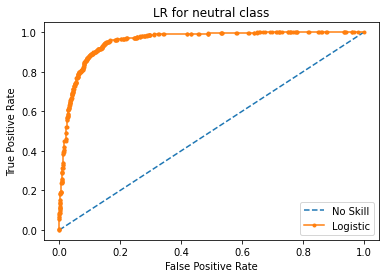

In [20]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


Accuracy of the LinearSVC model is for neutral class 0.8973063973063973
No Skill: ROC AUC=0.500
LSVC: ROC AUC=0.951


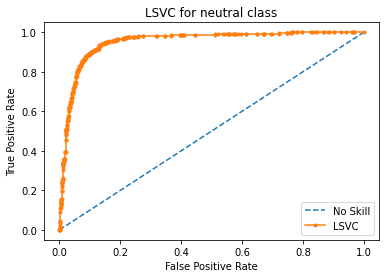

In [28]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC(multi_class='ovr',max_iter=5000)
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LinearSVC model is for neutral class", accuracy)
# predict probabilities
lr_probs = model._predict_proba_lr(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LSVC: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LSVC for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
